In [65]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

data = pd.read_csv(r'C:\Users\Auditics Lap-\Downloads\creditcard.csv')
print(data.head(2))
print(data['Class'].value_counts())
scaler = StandardScaler()
data[['Time','Amount']] = scaler.fit_transform(data[['Time','Amount']])
print('') # for between space

print('After standard Scaler Transform')
print('') # for between space

print(data.head(2))


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  

[2 rows x 31 columns]
Class
0    284315
1       492
Name: count, dtype: int64

After standard Scaler Transform

       Time        V1        V2        V3        V4        V5        V6  \
0 -1.996583 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1 -1.996583  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   

         V7        V8        

In [27]:
x = data.drop(columns = ['Class'])
y = data['Class']

smote = SMOTE()
x_resample,y_resample = smote.fit_resample(x,y)

x_train,x_test,y_train,y_test = train_test_split(x_resample,y_resample , test_size = 0.2)

model = LogisticRegression(class_weight = 'balanced')

model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred_prob = model.predict_proba(x_test)[:,1]

cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test,y_pred)
roc = roc_auc_score(y_test,y_pred_prob)

print('confusion_matrix : ', cm)
print('classification_report : ', cr)
print('roc_auc_score : ', roc)

confusion_matrix :  [[55581  1359]
 [ 4604 52182]]
classification_report :                precision    recall  f1-score   support

           0       0.92      0.98      0.95     56940
           1       0.97      0.92      0.95     56786

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726

roc_auc_score :  0.9892262033485524


In [37]:
test_data = pd.read_csv(r'C:\Users\Auditics Lap-\Downloads\sample_test_data.csv')

y_pred_2 = model.predict(test_data)

y_pred_2

array([1, 1, 0], dtype=int64)

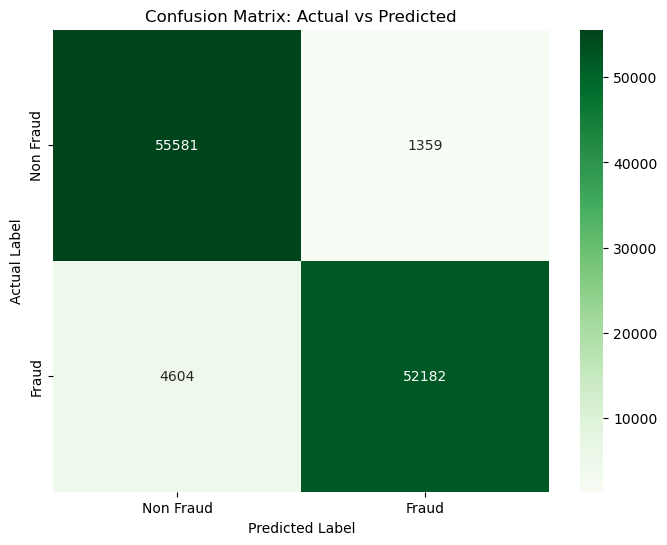

In [63]:
import matplotlib.pyplot as plt
import seaborn as sea

# Plot the heatmap
plt.figure(figsize=(8, 6))
sea.heatmap(cm, cmap=('Greens'), annot=True, fmt='d', xticklabels=['Non Fraud', 'Fraud'], yticklabels=['Non Fraud', 'Fraud'])
plt.title('Confusion Matrix: Actual vs Predicted')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()
